<a href="https://colab.research.google.com/github/dev-EthanJ/scikit-learn_Machine_Learning/blob/main/20221109_scikit-learn_ML_kNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learn Machine Learning k-NN algorithm <br> 사이킷런 머신러닝 k-NN 알고리즘

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
# https://archive.ics.uci.edu/ml/datasets/wine
# https://www.kaggle.com/datasets/akhil0007/wine-data

file_url = 'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/'
data = 'wine.csv'

df = pd.read_csv(file_url + data)

In [3]:
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


- 결측치 없음
- 모두 수치화 된 data

In [5]:
pd.options.display.float_format = '{:,.4f}'.format
# 기술 통계
df.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,1.9382,13.0006,2.3363,2.3665,19.4949,99.7416,2.2951,2.0293,0.3619,1.5909,5.0581,0.9574,2.6117,746.8933
std,0.7750,0.8118,1.1171,0.2743,3.3396,14.2825,0.6259,0.9989,0.1245,0.5724,2.3183,0.2286,0.7100,314.9075
min,1.0000,11.0300,0.7400,1.3600,10.6000,70.0000,0.9800,0.3400,0.1300,0.4100,1.2800,0.4800,1.2700,278.0000
25%,1.0000,12.3625,1.6025,2.2100,17.2000,88.0000,1.7425,1.2050,0.2700,1.2500,3.2200,0.7825,1.9375,500.5000
50%,2.0000,13.0500,1.8650,2.3600,19.5000,98.0000,2.3550,2.1350,0.3400,1.5550,4.6900,0.9650,2.7800,673.5000
75%,3.0000,13.6775,3.0825,2.5575,21.5000,107.0000,2.8000,2.8750,0.4375,1.9500,6.2000,1.1200,3.1700,985.0000
max,3.0000,14.8300,5.8000,3.2300,30.0000,162.0000,3.8800,5.0800,0.6600,3.5800,13.0000,1.7100,4.0000,"1,680.0000"


1. 변수마다 값의 범위가 다름

    - `Nonflavanoid_Phenols` : 0.13 ~ 0.66

    - `Proline` : 278 ~ 1680

- 🤔 스케일링(scaling) : 독립변수의 범위를 동일한 수준으로 만들어주는 기법

2. Outlier(이상치)

    - `color_inensity` : 75% ~ max : 6.2 ~ 13: 2배 이상 증가

### 목표 value에서 고유값 check

In [6]:
df['Class'].unique()

array([1, 2, 3])

In [7]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

### 고유값 Bar Chart Visualization

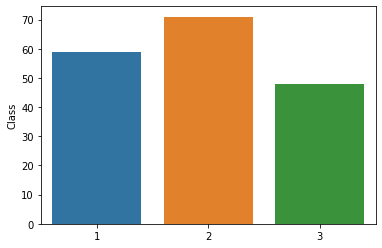

In [8]:
value_counts = df.Class.value_counts()

# column 'Class' 분포 시각화 확인
sns.barplot(x=value_counts.index, y=value_counts)
plt.show()

## Data pre-processing

### 스케일링(Scaling)

- 데이터의 스케일(Scale, 범위)을 맞추는 작업

- K-최근접 이웃은 거리 기반의 알고리즘이기 때문에 이러한 스케일 차이는 결과를 왜곡할 수 있음

- 스케일링은 이러한 문제를 해결하기 위해 인위적으로 각 컬럼(변수)이 비슷한 범위를 가지도록 만드는 작업

- 데이터를 **동등한 수준**에서 연산하게 함

#### 스케일링 종류

|종류|설명
|-|-|
|표준화 스케일링 Standarad Scaling|평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용|
|로버스트 스케일링 Robust Scaling|데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용|
|최소-최대 스케일링 Min-Max Scaling|데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
|정규화 스케일링Normalizer Scaling|행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

- 평균을 사용하면 Outlier(이상치)에게 당한다!



In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#### 표준화 스케일링
> 데이터를 표준정규분포 형태로 변형

$x_i-mean(x)\over sd(x)$

* $x_i$ : 변수의 i번째 값
* $mean(x)$ : 해당 변수의 평균
* $sd(x)$ : 해당 변수의 표준편차


In [10]:
std_scaler = StandardScaler()

std_scaler.fit(df)

StandardScaler()

- `StandardScaler.transform(DataFrame)`: Scaler가 `fit()`을 통해 학습한 정보를 기반으로 data를 scaling하게 하는 함수

In [11]:
std_scaled = std_scaler.transform(df)

std_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
df_std_scaled = pd.DataFrame(std_scaled, columns=df.columns)

df_std_scaled.head(10)

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,-1.2139,1.5186,-0.5622,0.2321,-1.1696,1.9139,0.8090,1.0348,-0.6596,1.2249,0.2517,0.3622,1.8479,1.0130
1,-1.2139,0.2463,-0.4994,-0.8280,-2.4908,0.0181,0.5686,0.7336,-0.8207,-0.5447,-0.2933,0.4061,1.1134,0.9652
2,-1.2139,0.1969,0.0212,1.1093,-0.2687,0.0884,0.8090,1.2155,-0.4984,2.1360,0.2690,0.3183,0.7886,1.3951
3,-1.2139,1.6915,-0.3468,0.4879,-0.8093,0.9309,2.4914,1.4665,-0.9819,1.0322,1.1861,-0.4275,1.1841,2.3346
4,-1.2139,0.2957,0.2277,1.8404,0.4519,1.2820,0.8090,0.6634,0.2268,0.4014,-0.3193,0.3622,0.4496,-0.0379
5,-1.2139,1.4816,-0.5174,0.3052,-1.2897,0.8607,1.5621,1.3661,-0.1761,0.6642,0.7319,0.4061,0.3366,2.2390
6,-1.2139,1.7163,-0.4186,0.3052,-1.4699,-0.2627,0.3283,0.4927,-0.4984,0.6817,0.0830,0.2744,1.3677,1.7295
7,-1.2139,1.3086,-0.1673,0.8900,-0.5690,1.4926,0.4885,0.4826,-0.4178,-0.5973,-0.0035,0.4499,1.3677,1.7454
8,-1.2139,2.2598,-0.6251,-0.7183,-1.6500,-0.1925,0.8090,0.9545,-0.5790,0.6817,0.0614,0.5377,0.3366,0.9493
9,-1.2139,1.0616,-0.8854,-0.3528,-1.0495,-0.1223,1.0974,1.1252,-1.1430,0.4540,0.9352,0.2306,1.3253,0.9493


In [13]:
pd.options.display.float_format = '{:,.2f}'.format

# 표준화: mean = 0, std = 1
df_std_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-1.21,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.08,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,1.37,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,1.37,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


#### 로버스트 스케일링
> 사분위값을 이용하여 계산

$x_i-Q_2(x)\over Q_3(x)-Q_1(x)$

* $x_i$ : 변수의 i번째 값
* $Q_1(x)$ : 25% 지점
* $Q_2(x)$ : 50% 지점 (변수의 중윗값)
* $Q_3(x)$ : 75% 지점

In [14]:
rb_scaler = RobustScaler()

- `fit()` + `transform()` = `Scaler.fit_transform(DataFrame)`

In [15]:
rb_scaled = rb_scaler.fit_transform(df)
df_rb_scaled = pd.DataFrame(rb_scaled, columns=df.columns)

df_rb_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.03,-0.04,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15
std,0.39,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65
min,-0.50,-1.54,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82
25%,-0.50,-0.52,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
75%,0.50,0.48,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64
max,0.50,1.35,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08


#### 최소-최대 스케일링
> 최솟값, 최댓값을 사용하여 스케일링, 모든 컬럼에서 최댓값이 1, 최솟값이 0인 형태로 변환됨

$x_i-min(x)\over max(x)-min(x)$

* $x_i$ : 변수의 i번째 값
* $min(x)$ : 최솟값
* $max(x)$ : 최댓값

In [16]:
mm_scaler = MinMaxScaler()

mm_scaled = mm_scaler.fit_transform(df)
df_mm_scaled = pd.DataFrame(mm_scaled, columns=df.columns)

df_mm_scaled.describe()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.47,0.52,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33
std,0.39,0.21,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.35,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16
50%,0.50,0.53,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28
75%,1.00,0.70,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### 스케일링 방식 선택 기준
* 아웃라이어의 유무 : 아웃라이어 영향이 클 시: `로버스트 스케일링` (4분위값 이용)
* 데이터의 기존 분포를 최대한 유지해야할 시 : `최소-최대 스케일링`
* 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 상황 : `표준화 스케일링`

#### 스케일링별 특징
|구분|결과물의 특징|
|-|-|
|표준화 스케일링|아웃라이어의 영향을 받음.<br>평균 0, 분산 1이 되게끔 분포시키기 때문에, **데이터의 기존 분포 형태가 사라지고** 정규분포를 따르는 결과물을 가져 옴|
|로버스트 스케일링|데이터에 아웃라이어가 존재할 때,<br> **아웃라이어의 영향을 받지 않음**.<br>변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남|
|최소-최대 스케일링|아웃라이어의 영향을 받음.<br>위의 두 스케일러와 비교했을 때, **데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화**시킴.<br>데이터의 범위는 0~1로 나타남|

#### 스케일링 적용 시 주의점
* 스케일링 대상에서 `종속변수`를 제외: 종속변수가 model 예측 대상이다
* 스케일링 전 `train set`과 `test set`을 구분: modeling에 영향을 끼치는 것들은 미리 선정

#### Scaling
: Outlier의 영향 줄이기, 범위에 따른 거리의 왜곡 줄이기

- 훈련의 대상이 되는 데이터 vs. 시험의 대상이 되는 데이터: 독립돼 있어야 함

- 만약 둘을 합쳐서 scaling을 하면, scale의 기준 data(minmax, mean, 4분위 값)이 공유됨

    - train set을 대상으로만 scaling: scaler 학습 (train set 학습 scaler)

    - test set도 이미 학습된 scaler(train set 학습된 scaler)로 scaling을 진행

- `train set`과 `test set` 분리

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Class']),
    df['Class'],
    test_size = 0.3, random_state = 814
)

- 데이터 특성 보존을 위해 MinMaxScaler 사용

In [18]:
mm_scaler = MinMaxScaler()

- 클래스를 통해 만들어진 변수와 함수의 묶음: 객체 (object, instance)

    - 객체에 소속된 변수: property

    - 객체에 소속된 함수: method

In [19]:
X_train_scaled = mm_scaler.fit_transform(X_train)

# mm_scaler가 이미 fitting되었기 때문에 transform(scaling)만 진행
X_test_scaled = mm_scaler.transform(X_test)

## Training Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

pred

array([3, 3, 1, 2, 2, 3, 2, 1, 2, 2, 3, 1, 1, 3, 2, 2, 3, 1, 2, 1, 2, 3,
       3, 2, 2, 2, 2, 1, 2, 1, 2, 3, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 3,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 3])

## Evaluating Model

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9814814814814815

### Scaling되지 않은 Data 사용 > `accuracy_score` 하락

In [23]:
new_knn = KNeighborsClassifier()
new_knn.fit(X_train, y_train)
new_pred = new_knn.predict(X_test)

accuracy_score(y_test, new_pred)

0.7592592592592593

### 하이퍼파라미터 튜닝(Hyperparameter tuning or optimization)
- parameter를 통해서 algorithms에 들어가는 values setting
  - 항상 같은 parameter value가 적용되는 게 맞을까?

- `KNeighborsClassifier`: 분류 문제 알고리즘

    - **`n_neighbors=5`: 예측에 참고할 이웃 수**

    - `weights='uniform'`: 예측에 사용되는 가중치 함수, default인 uniform은 모든 포인트에 동일한 가중치가 부여.   
    \> `'uniform'`, `'distance'`, `사용자 정의 함수` 가능

    - `metric='minkowski'`: 거리 측정 기준 (DistanceMetric)

    - `n_jobs=None`: 실행할 병렬 작업 수

> 별도로 지정해주지 않으면 기본값으로 반영<br>
> 알고리즘에 쓰이는 매개변수를 조정 = **Hyperparameter tuning**

In [24]:
# hyperparameter tuning 함수화
def tuning(n: int) -> float:
  knn = KNeighborsClassifier(n_neighbors=n)
  
  # fit할 때 setting됨
  knn.fit(X_train_scaled, y_train)

  pred = knn.predict(X_test_scaled)
  score = accuracy_score(y_test, pred)
  return score

In [25]:
# n_neighbors=1
tuning(1)

0.9444444444444444

In [26]:
scores = [(i+1, tuning(i+1)) for i in range(20)]

scores

[(1, 0.9444444444444444),
 (2, 0.9444444444444444),
 (3, 0.9444444444444444),
 (4, 0.9814814814814815),
 (5, 0.9814814814814815),
 (6, 0.9629629629629629),
 (7, 0.9814814814814815),
 (8, 0.9814814814814815),
 (9, 0.9814814814814815),
 (10, 0.9814814814814815),
 (11, 0.9814814814814815),
 (12, 0.9814814814814815),
 (13, 0.9814814814814815),
 (14, 0.9814814814814815),
 (15, 0.9814814814814815),
 (16, 0.9814814814814815),
 (17, 0.9814814814814815),
 (18, 0.9629629629629629),
 (19, 0.9814814814814815),
 (20, 0.9814814814814815)]

In [27]:
sorted(scores, key=lambda x: x[1], reverse=True)

[(4, 0.9814814814814815),
 (5, 0.9814814814814815),
 (7, 0.9814814814814815),
 (8, 0.9814814814814815),
 (9, 0.9814814814814815),
 (10, 0.9814814814814815),
 (11, 0.9814814814814815),
 (12, 0.9814814814814815),
 (13, 0.9814814814814815),
 (14, 0.9814814814814815),
 (15, 0.9814814814814815),
 (16, 0.9814814814814815),
 (17, 0.9814814814814815),
 (19, 0.9814814814814815),
 (20, 0.9814814814814815),
 (6, 0.9629629629629629),
 (18, 0.9629629629629629),
 (1, 0.9444444444444444),
 (2, 0.9444444444444444),
 (3, 0.9444444444444444)]

## KNN 알고리즘 이해

- KNN 알고리즘 : 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터과 같은 종류로 분류

- 변수의 스케일 간의 격차가 클 경우, 산출되는 거리값이 왜곡될 수 있음

- 거리가 동점일 경우
    
    - scikit-learn: 랜덤으로 분류함

    - n을 홀수로 하면 동점을 근본적으로 막을 수 있음

    - 그럼에도 짝수를 써야한다면 weights를 통해 가중치를 줌

연습

- 타이타닉 데이터에 KNN을 통해 분류 진행

- 스케일러(표준화, 로버스트, 최소-최대)별 결과 비교

# Titanic Data Prediction by k-NN Algorithm

1. Data Collection

2. Data pre-processing

3. Training Model

4. Evaluating Model

### Data Collection

In [28]:
file_url = 'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/titanic_train.csv'
df_train = pd.read_csv(file_url, index_col=0)

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data pre-processing

#### 결측치 처리: `Cabin`

In [31]:
df_train.Cabin.nunique()

147

- 너무 다양하고 결측치 많음 → drop

In [32]:
df_train = df_train.drop(['Cabin'], axis=1)

#### 결측치 처리: `Embarked`

In [33]:
sample = df_train.copy()

In [34]:
sample.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
sample.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

- 최빈값 'S'로 `.fillna()`

In [36]:
sample.Embarked = sample.Embarked.fillna('S')

sample.Embarked.isnull().sum()

0

In [37]:
sample.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [38]:
df_train = sample

#### 무수한 value column 처리: `Ticket`

In [39]:
df_train['Ticket'].nunique()

681

In [40]:
df_train = df_train.drop(columns=['Ticket'])

df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### `Name` column: `Title` column 추출

In [41]:
df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- 10개 미만의 개수를 가진 value를 `rare_list`에 추가

In [42]:
title_unique = df_train.Title.unique()

rare_list = [title for title in title_unique if df_train.Title.value_counts()[title] < 10]

rare_list

['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [43]:
df_train.Title = df_train.Title.replace(rare_list, 'Rare')

df_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

- 각 `Title`별 `Age`의 평균

In [44]:
title_age_mean = df_train.groupby('Title')['Age'].mean()

title_age_mean

Title
Master    4.57
Miss     21.77
Mr       32.37
Mrs      35.90
Rare     42.38
Name: Age, dtype: float64

In [45]:
for title in df_train.Title.unique():
    df_train.loc[(df_train.Age.isnull()) & (df_train.Title == title), 'Age'] = title_age_mean[title]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [46]:
df_train = df_train.drop(columns=['Name'])

df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [47]:
for col in df_train.columns:
  print(col, df_train[col].nunique(), df_train[col].dtype)

Survived 2 int64
Pclass 3 int64
Sex 2 object
Age 93 float64
SibSp 7 int64
Parch 7 int64
Fare 248 float64
Embarked 3 object
Title 5 object


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


#### Categorical data (`Dtype=object`): `.get_dummies()`

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [50]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Title'])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Sex_female    891 non-null    uint8  
 7   Sex_male      891 non-null    uint8  
 8   Embarked_C    891 non-null    uint8  
 9   Embarked_Q    891 non-null    uint8  
 10  Embarked_S    891 non-null    uint8  
 11  Title_Master  891 non-null    uint8  
 12  Title_Miss    891 non-null    uint8  
 13  Title_Mr      891 non-null    uint8  
 14  Title_Mrs     891 non-null    uint8  
 15  Title_Rare    891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(10)
memory usage: 57.4 KB


In [51]:
pd.options.display.float_format = '{:,.4f}'.format

df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
count,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.7551,0.5230,0.3816,32.2042,0.3524,0.6476,0.1886,0.0864,0.7250,0.0449,0.2043,0.5802,0.1403,0.0303
std,0.4866,0.8361,13.2776,1.1027,0.8061,49.6934,0.4780,0.4780,0.3914,0.2811,0.4468,0.2072,0.4034,0.4938,0.3475,0.1715
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,2.0000,21.7740,0.0000,0.0000,7.9104,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,3.0000,30.0000,0.0000,0.0000,14.4542,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
75%,1.0000,3.0000,35.8981,1.0000,0.0000,31.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Training Model: MinMaxScaler

In [52]:
# train set과 test set 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # 'Survived' column: 종속 변수
    df_train.drop('Survived', axis=1),
    df_train.Survived, test_size = 0.2, random_state = 814
)

In [53]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0])

### Evaluating Model

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8156424581005587

In [56]:
def tuning(n: int) -> float:
  knn = KNeighborsClassifier(n_neighbors=n)
  # fit할 때 hyperparameter tuning됨
  knn.fit(X_train_scaled, y_train)

  pred = knn.predict(X_test_scaled)
  score = accuracy_score(y_test, pred)
  return score

In [57]:
train_list = [[i, tuning(i)] for i in range(1,51)]

In [58]:
sorted_list = sorted(train_list, key=lambda x: x[1], reverse=True)

sorted_list

[[15, 0.8324022346368715],
 [14, 0.8268156424581006],
 [13, 0.8212290502793296],
 [16, 0.8212290502793296],
 [5, 0.8156424581005587],
 [17, 0.8156424581005587],
 [26, 0.8156424581005587],
 [27, 0.8156424581005587],
 [8, 0.8100558659217877],
 [3, 0.8044692737430168],
 [4, 0.8044692737430168],
 [11, 0.8044692737430168],
 [12, 0.8044692737430168],
 [28, 0.8044692737430168],
 [29, 0.8044692737430168],
 [30, 0.8044692737430168],
 [31, 0.8044692737430168],
 [32, 0.8044692737430168],
 [33, 0.8044692737430168],
 [35, 0.8044692737430168],
 [7, 0.7988826815642458],
 [34, 0.7988826815642458],
 [37, 0.7988826815642458],
 [10, 0.7932960893854749],
 [18, 0.7932960893854749],
 [23, 0.7932960893854749],
 [24, 0.7932960893854749],
 [25, 0.7932960893854749],
 [6, 0.7877094972067039],
 [19, 0.7877094972067039],
 [21, 0.7877094972067039],
 [36, 0.7877094972067039],
 [38, 0.7877094972067039],
 [39, 0.7877094972067039],
 [40, 0.7877094972067039],
 [41, 0.7877094972067039],
 [42, 0.7877094972067039],
 [43, 0

In [59]:
f'타이타닉 데이터셋으로, k-NN 알고리즘 기반 MinMaxScailing 사용시 k={sorted_list[0][0]}에서 {sorted_list[0][1] * 100}%의 예측 정확도를 보였다.'

'타이타닉 데이터셋으로, k-NN 알고리즘 기반 MinMaxScailing 사용시 k=15에서 83.24022346368714%의 예측 정확도를 보였다.'

In [60]:
df_corr = df_train.corr()

df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
Survived,1.0000,-0.3385,-0.0892,-0.0353,0.0816,0.2573,0.5434,-0.5434,0.1682,0.0037,-0.1497,0.0852,0.3271,-0.5492,0.3390,0.0220
Pclass,-0.3385,1.0000,-0.3436,0.0831,0.0184,-0.5495,-0.1319,0.1319,-0.2433,0.2210,0.0741,0.0821,-0.0006,0.1427,-0.1492,-0.2063
Age,-0.0892,-0.3436,1.0000,-0.2677,-0.1968,0.0911,-0.1174,0.1174,0.0414,-0.0478,-0.0062,-0.4114,-0.3047,0.2315,0.1870,0.1682
SibSp,-0.0353,0.0831,-0.2677,1.0000,0.4148,0.1597,0.1146,-0.1146,-0.0595,-0.0264,0.0687,0.3496,0.0879,-0.2505,0.0634,-0.0364
Parch,0.0816,0.0184,-0.1968,0.4148,1.0000,0.2162,0.2455,-0.2455,-0.0111,-0.0812,0.0608,0.2673,0.1056,-0.3339,0.2259,-0.0675
Fare,0.2573,-0.5495,0.0911,0.1597,0.2162,1.0000,0.1823,-0.1823,0.2693,-0.1172,-0.1622,0.0109,0.1183,-0.1838,0.1052,0.0246
Sex_female,0.5434,-0.1319,-0.1174,0.1146,0.2455,0.1823,1.0000,-1.0000,0.0829,0.0741,-0.1192,-0.1599,0.6868,-0.8673,0.5476,-0.0345
Sex_male,-0.5434,0.1319,0.1174,-0.1146,-0.2455,-0.1823,-1.0000,1.0000,-0.0829,-0.0741,0.1192,0.1599,-0.6868,0.8673,-0.5476,0.0345
Embarked_C,0.1682,-0.2433,0.0414,-0.0595,-0.0111,0.2693,0.0829,-0.0829,1.0000,-0.1483,-0.7827,-0.0352,0.0262,-0.0726,0.0614,0.0654
Embarked_Q,0.0037,0.2210,-0.0478,-0.0264,-0.0812,-0.1172,0.0741,-0.0741,-0.1483,1.0000,-0.4994,0.0105,0.1711,-0.0783,-0.0897,-0.0078


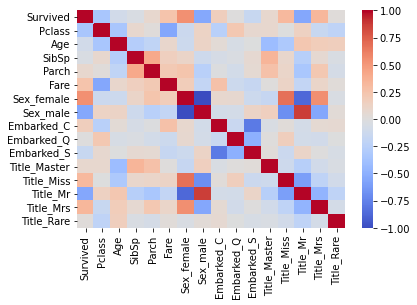

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_corr, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

- 생각보다 'Age'가 매우 낮게 (0.1미만으로) 나와서 당황스러움. 노약자와 유소년층을 배려해서 구조하진 않았나보다... 그렇다면?

## Age value에 따라 Category 분류: `Weak` column

In [62]:
df_age = df_train.copy()

df_age['Weak'] = 0

df_age['Weak'].value_counts()

0    891
Name: Weak, dtype: int64

In [63]:
df_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Weak
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,22.0000,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0
2,1,1,38.0000,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0
3,1,3,26.0000,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0
4,1,1,35.0000,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0
5,0,3,35.0000,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0


In [64]:
df_age.loc[(df_age.Age <= 12) | (df_age.Age >= 65), 'Weak'] = 1

df_age.Weak.value_counts()

0    807
1     84
Name: Weak, dtype: int64

In [65]:
df_corr = df_age.corr()

df_corr

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Weak
Survived,1.0000,-0.3385,-0.0892,-0.0353,0.0816,0.2573,0.5434,-0.5434,0.1682,0.0037,-0.1497,0.0852,0.3271,-0.5492,0.3390,0.0220,0.0850
Pclass,-0.3385,1.0000,-0.3436,0.0831,0.0184,-0.5495,-0.1319,0.1319,-0.2433,0.2210,0.0741,0.0821,-0.0006,0.1427,-0.1492,-0.2063,0.0877
Age,-0.0892,-0.3436,1.0000,-0.2677,-0.1968,0.0911,-0.1174,0.1174,0.0414,-0.0478,-0.0062,-0.4114,-0.3047,0.2315,0.1870,0.1682,-0.4007
SibSp,-0.0353,0.0831,-0.2677,1.0000,0.4148,0.1597,0.1146,-0.1146,-0.0595,-0.0264,0.0687,0.3496,0.0879,-0.2505,0.0634,-0.0364,0.3452
Parch,0.0816,0.0184,-0.1968,0.4148,1.0000,0.2162,0.2455,-0.2455,-0.0111,-0.0812,0.0608,0.2673,0.1056,-0.3339,0.2259,-0.0675,0.3430
Fare,0.2573,-0.5495,0.0911,0.1597,0.2162,1.0000,0.1823,-0.1823,0.2693,-0.1172,-0.1622,0.0109,0.1183,-0.1838,0.1052,0.0246,-0.0066
Sex_female,0.5434,-0.1319,-0.1174,0.1146,0.2455,0.1823,1.0000,-1.0000,0.0829,0.0741,-0.1192,-0.1599,0.6868,-0.8673,0.5476,-0.0345,0.0193
Sex_male,-0.5434,0.1319,0.1174,-0.1146,-0.2455,-0.1823,-1.0000,1.0000,-0.0829,-0.0741,0.1192,0.1599,-0.6868,0.8673,-0.5476,0.0345,-0.0193
Embarked_C,0.1682,-0.2433,0.0414,-0.0595,-0.0111,0.2693,0.0829,-0.0829,1.0000,-0.1483,-0.7827,-0.0352,0.0262,-0.0726,0.0614,0.0654,0.0016
Embarked_Q,0.0037,0.2210,-0.0478,-0.0264,-0.0812,-0.1172,0.0741,-0.0741,-0.1483,1.0000,-0.4994,0.0105,0.1711,-0.0783,-0.0897,-0.0078,-0.0172


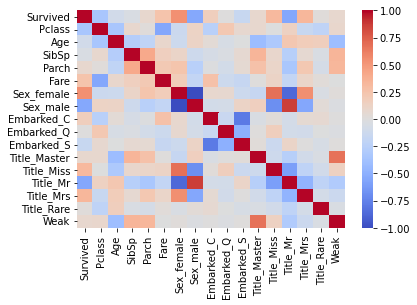

In [66]:
sns.heatmap(df_corr, cmap='coolwarm', vmax=1, vmin=-1)

plt.show()

- `Age` column value = $a$에 대해, $a \leq 12, 65 \leq a$일 때, `Weak` = 1로 설정했다. (노약자 표시)

- 그러나 상관계수는 여전히 약 0.084로 `Survived`와 `Weak`간의 관계는 거의 없음을 의미한다.

### Kaggle Competition Submission

In [67]:
submission = pd.read_csv(f'https://raw.githubusercontent.com/dev-EthanJ/scikit-learn_Machine_Learning/main/data/titanic_test.csv', index_col=0)

submission.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S


In [68]:
def pre_processing(df_train: pd.DataFrame):
    df_train = df_train.drop(['Cabin'], axis=1)
    df_train.Embarked = df_train.Embarked.fillna('S')
    df_train = df_train.drop(columns=['Ticket'])
    df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.')
    title_unique = df_train.Title.unique()
    rare_list = [title for title in title_unique if df_train.Title.value_counts()[title] < 10]
    df_train.Title = df_train.Title.replace(rare_list, 'Rare')
    title_age_mean = df_train.groupby('Title')['Age'].mean()
    for title in df_train.Title.unique():
        df_train.loc[(df_train.Age.isnull()) & (df_train.Title == title), 'Age'] = title_age_mean[title]
    df_train = df_train.drop(columns=['Name'])
    df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Title'])

    return df_train

In [69]:
df_sub = pre_processing(submission)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          417 non-null    float64
 5   Sex_female    418 non-null    uint8  
 6   Sex_male      418 non-null    uint8  
 7   Embarked_C    418 non-null    uint8  
 8   Embarked_Q    418 non-null    uint8  
 9   Embarked_S    418 non-null    uint8  
 10  Title_Master  418 non-null    uint8  
 11  Title_Miss    418 non-null    uint8  
 12  Title_Mr      418 non-null    uint8  
 13  Title_Mrs     418 non-null    uint8  
 14  Title_Rare    418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 23.7 KB


In [70]:
df_sub.loc[df_sub.Fare.isnull(), 'Fare'] = df_sub.Fare.mean()

df_sub.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
PassengerId,,,,,,,,,,,,,,,
892,3,34.5000,0,0,7.8292,0,1,0,1,0,0,0,1,0,0
893,3,47.0000,1,0,7.0000,1,0,0,0,1,0,0,0,1,0
894,2,62.0000,0,0,9.6875,0,1,0,1,0,0,0,1,0,0
895,3,27.0000,0,0,8.6625,0,1,0,0,1,0,0,1,0,0
896,3,22.0000,1,1,12.2875,1,0,0,0,1,0,0,0,1,0


In [71]:
df_sub_scaled = mm_scaler.transform(df_sub)
pred = knn.predict(df_sub_scaled)

pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
result = pd.DataFrame({'PassengerId':df_sub.index,'Survived':pred})

result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0


In [73]:
result.to_csv('titanic_kNN_submission.csv', index=False)